In [136]:
import pandas as pd
credit_data=pd.read_csv('credit_data.csv')
credit_data.head()

,clientid,income,age,loan,loan_to_income,known_value
0,1,66155.92510,59.017015,8106.532131,0.122537,0
1,2,34415.15397,48.117153,6564.745018,0.190752,0
2,3,57317.17006,63.108049,8020.953296,0.139940,0
3,4,42709.53420,45.751972,6103.642260,0.142911,0
4,5,66952.68885,18.584336,8770.099235,0.130990,1


In [137]:
x=credit_card.iloc[:, 1:4].values
y = credit_card.iloc[:,5].values

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [139]:
x_scaled

array([[0.9231759 , 0.89209175, 0.58883739],
       [0.28812165, 0.65470788, 0.47682695],
       [0.74633429, 0.9811888 , 0.58262011],
       ...,
       [0.48612202, 0.21695807, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.82970913, 0.53597028]])

In [140]:
from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [141]:
# import keras library and packages
# Initializing the ANN
# Adding the input layer and the first hidden layer
# Adding second hidden layer
# Adding output layer
# Compiling the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 5,activation = 'sigmoid', input_dim = 3))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [142]:
# Fitting the ANN to the training set
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 4, epochs = 100)

Train on 1399 samples, validate on 200 samples
Epoch 1/100
1399/1399 [==============================] - 3s 2ms/step - loss: 0.6149 - accuracy: 0.6769 - val_loss: 0.4750 - val_accuracy: 0.8550
Epoch 2/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.4328 - accuracy: 0.8585 - val_loss: 0.4155 - val_accuracy: 0.8550
Epoch 3/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.4013 - accuracy: 0.8585 - val_loss: 0.4018 - val_accuracy: 0.8550
Epoch 4/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.3920 - accuracy: 0.8585 - val_loss: 0.3951 - val_accuracy: 0.8550
Epoch 5/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.3853 - accuracy: 0.8585 - val_loss: 0.3886 - val_accuracy: 0.8550
Epoch 6/100
1399/1399 [==============================] - 2s 2ms/step - loss: 0.3784 - accuracy: 0.8585 - val_loss: 0.3816 - val_accuracy: 0.8550
Epoch 7/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.3710

Epoch 57/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.1385 - accuracy: 0.9378 - val_loss: 0.1303 - val_accuracy: 0.9450
Epoch 58/100
1399/1399 [==============================] - 3s 2ms/step - loss: 0.1375 - accuracy: 0.9400 - val_loss: 0.1293 - val_accuracy: 0.9450
Epoch 59/100
1399/1399 [==============================] - 3s 2ms/step - loss: 0.1372 - accuracy: 0.9407 - val_loss: 0.1292 - val_accuracy: 0.9450
Epoch 60/100
1399/1399 [==============================] - 3s 2ms/step - loss: 0.1365 - accuracy: 0.9378 - val_loss: 0.1289 - val_accuracy: 0.9450
Epoch 61/100
1399/1399 [==============================] - 4s 3ms/step - loss: 0.1360 - accuracy: 0.9392 - val_loss: 0.1286 - val_accuracy: 0.9500
Epoch 62/100
1399/1399 [==============================] - 3s 2ms/step - loss: 0.1353 - accuracy: 0.9414 - val_loss: 0.1277 - val_accuracy: 0.9450
Epoch 63/100
1399/1399 [==============================] - 7s 5ms/step - loss: 0.1350 - accuracy: 0.9414 - val_loss: 0.1267 -

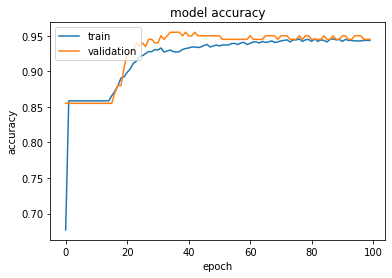

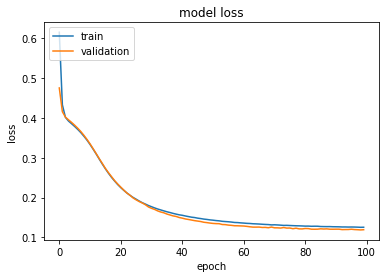

In [145]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
test_predict=model.predict(x_test)
#print(test_predict)
test_predict = (test_predict > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.9476309226932669

In [147]:
val_predict=model.predict(x_val)
#print(test_predict)
val_predict = (val_predict > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, val_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.945

In [155]:
credit_data.to_csv('F:/Faizan/MyLoans.csv', encoding='utf-8', index=False)


In [156]:
loan_data=pd.read_csv('MyLoans.csv')
loan_data.head()

,clientid,income,age,loan,loan_to_income,known_value
0,1,66155.92510,59.017015,8106.532131,0.122537,0
1,2,34415.15397,48.117153,6564.745018,0.190752,0
2,3,57317.17006,63.108049,8020.953296,0.139940,0
3,4,42709.53420,45.751972,6103.642260,0.142911,0
4,5,66952.68885,18.584336,8770.099235,0.130990,1


# Change the last five value of the know_value

In [173]:
update_col=loan_data.iloc[:,5].values
print(len(update_col))
for i in range(len(update_col)):
    if i > 1995:
        update_col[i]=1;
      

2000


# Change column name 

In [174]:
# Change column name 
loan_data = loan_data.rename(columns = {'income':'Inc','age':'atttained age','loan':'borrowed','loan_to_income':'redundant_feature','known_value':'answer'})

In [175]:
loan_data

,clientid,Inc,atttained age,borrowed,redundant_feature,answer
0,1,66155.92510,59.017015,8106.532131,0.122537,0
1,2,34415.15397,48.117153,6564.745018,0.190752,0
2,3,57317.17006,63.108049,8020.953296,0.139940,0
3,4,42709.53420,45.751972,6103.642260,0.142911,0
4,5,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0.032535,1
1996,1997,69516.12757,23.162104,3503.176156,0.050394,1
1997,1998,44311.44926,28.017167,5522.786693,0.124636,1
1998,1999,43756.05660,63.971796,1622.722598,0.037086,1


In [176]:
x=loan_data.iloc[:, 1:4].values
y = update_col

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [178]:
from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [182]:
# import keras library and packages
# Initializing the ANN
# Adding the input layer and the first hidden layer
# Adding second hidden layer
# Adding output layer
# Compiling the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
model2 = Sequential()
model2.add(Dense(units = 5,activation = 'sigmoid', input_dim = 3))
model2.add(Dense(units = 1, activation = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [183]:
# Fitting the ANN to the training set
history1=model2.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 4, epochs = 100)

Train on 1399 samples, validate on 200 samples
Epoch 1/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.5157 - accuracy: 0.8435 - val_loss: 0.4396 - val_accuracy: 0.8500
Epoch 2/100
1399/1399 [==============================] - 1s 1ms/step - loss: 0.4254 - accuracy: 0.8449 - val_loss: 0.4095 - val_accuracy: 0.8500
Epoch 3/100
1399/1399 [==============================] - 1s 937us/step - loss: 0.4091 - accuracy: 0.8449 - val_loss: 0.3970 - val_accuracy: 0.8500
Epoch 4/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.3983 - accuracy: 0.8449 - val_loss: 0.3858 - val_accuracy: 0.8500
Epoch 5/100
1399/1399 [==============================] - 1s 1ms/step - loss: 0.3864 - accuracy: 0.8449 - val_loss: 0.3739 - val_accuracy: 0.8500
Epoch 6/100
1399/1399 [==============================] - 1s 1ms/step - loss: 0.3740 - accuracy: 0.8449 - val_loss: 0.3616 - val_accuracy: 0.8500
Epoch 7/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.36

Epoch 57/100
1399/1399 [==============================] - 1s 1ms/step - loss: 0.1652 - accuracy: 0.9292 - val_loss: 0.1497 - val_accuracy: 0.9600
Epoch 58/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.1646 - accuracy: 0.9299 - val_loss: 0.1490 - val_accuracy: 0.9600
Epoch 59/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.1640 - accuracy: 0.9299 - val_loss: 0.1483 - val_accuracy: 0.9600
Epoch 60/100
1399/1399 [==============================] - 1s 929us/step - loss: 0.1635 - accuracy: 0.9307 - val_loss: 0.1478 - val_accuracy: 0.9600
Epoch 61/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.1633 - accuracy: 0.9299 - val_loss: 0.1471 - val_accuracy: 0.9600
Epoch 62/100
1399/1399 [==============================] - 2s 2ms/step - loss: 0.1626 - accuracy: 0.9321 - val_loss: 0.1464 - val_accuracy: 0.9650
Epoch 63/100
1399/1399 [==============================] - 2s 1ms/step - loss: 0.1623 - accuracy: 0.9299 - val_loss: 0.1457

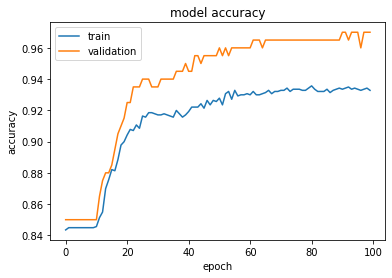

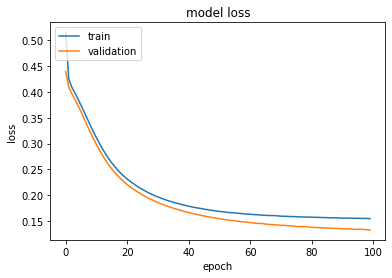

In [184]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [185]:
# Test Accuracy for laon dataset
test_predict=model2.predict(x_test)
#print(test_predict)
test_predict = (test_predict > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.9526184538653366

In [186]:
# Valdation accuracy for laon dataset
val_predict=model2.predict(x_val)
#print(test_predict)
val_predict = (val_predict > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, val_predict)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
accuracy

0.97

# Regression Model

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
 
model3 = LogisticRegression()
model3.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
# Test data accuracy against loan dataset
pred=model3.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, pred))

0.9476309226932669


In [189]:
# Validation data accuracy against loan dataset
pred=model3.predict(x_val)
# Print the prediction accuracy
print (metrics.accuracy_score(y_val, pred))

0.945


# What was the purpose of this assignment? What can you do now as a result of accomplishing it?

##### The purpose of this assignment is to analyze the effect of different features in the dataset. Changing the last five value of the known value column increase the accuracy of the model because now the probiblity of both 0 and 1 are equally same. Regression model result are less then classification result.